<Figure size 432x288 with 0 Axes>

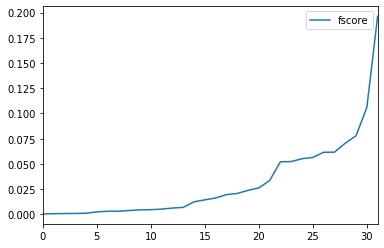

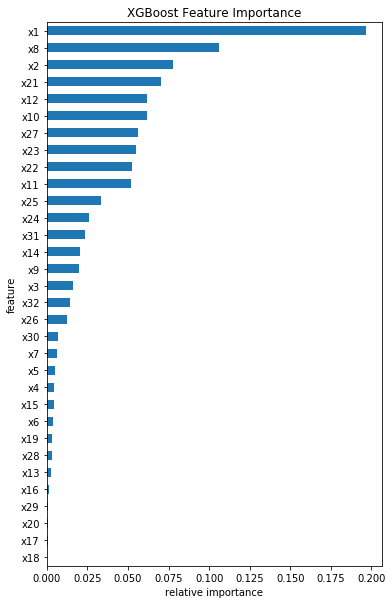

In [5]:
import pandas as pd
import xgboost as xgb
import operator
from matplotlib import pylab as plt

def ceate_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1

    outfile.close()

def get_data():
    train = pd.read_csv("datacountstudents.csv")

    features = list(train.columns[2:])

    y_train = train.yC

    for feat in train.select_dtypes(include=['object']).columns:
        m = train.groupby([feat])['yC'].mean()
        train[feat].replace(m,inplace=True)

    x_train = train[features]

    return features, x_train, y_train


features, x_train, y_train = get_data()
ceate_feature_map(features)

xgb_params = {"objective": "reg:linear", "eta": 0.01, "max_depth": 8, "seed": 42, "silent": 1}
num_rounds = 1000

dtrain = xgb.DMatrix(x_train, label=y_train)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)

importance = gbdt.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1))

df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')